In [1]:
#Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Concatenate, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# Load new dataset
import pandas as pd
# Update the path to your new dataset file
new_data_path = r"E:\Store-Demand-Forecasting-using-Time-Series-and-Neural-Networks\sales.xlsx"
data = pd.read_excel(new_data_path)
data.head()

,date,internal_client_id,product_id,product_name,product_ean,category,sub_category,city_name,units_sold,mrp,selling_price,gross_merchandise_value,gross_selling_value
0,2025-07-18,310mee980,477344,Stay Warm Steel Bowl with Anti-Skid Base (Red...,NaN,Baby Care,Feeding Essentials,rest of india,1,599.0,552.0,599,552.0
1,2025-06-17,310mee980,445017,Gentle Baby Wash (With Fruit Extracts)(Bottle),NaN,Baby Care,Bathing Needs,rest of india,1,349.0,267.0,349,267.0
2,2025-06-16,310mee980,561990,"Baby Mosquito Net (For Cradles, Cots, Strollers)",NaN,Cleaning Essentials,Mosquito Repellents,bhopal,1,499.0,370.0,499,370.0
3,2025-06-16,310mee980,561990,"Baby Mosquito Net (For Cradles, Cots, Strollers)",NaN,Cleaning Essentials,Mosquito Repellents,pune,1,499.0,370.0,499,370.0
4,2025-08-06,310mee980,561990,"Baby Mosquito Net For Cradles, Cots, Strollers",NaN,Cleaning Essentials,Mosquito Repellents,indore,1,499.0,370.0,499,370.0


In [3]:
# Basic data analysis
print('Shape:', data.shape)
print('Columns:', data.columns.tolist())
print('Missing values per column:')
print(data.isnull().sum())
print('Data types:')
print(data.dtypes)

display(data.describe())

data.head(10)

Shape: (43034, 13)
Columns: ['date', 'internal_client_id', 'product_id', 'product_name', 'product_ean', 'category', 'sub_category', 'city_name', 'units_sold', 'mrp', 'selling_price', 'gross_merchandise_value', 'gross_selling_value']
Missing values per column:
date                           0
internal_client_id             0
product_id                     0
product_name                   0
product_ean                43034
category                       0
sub_category                   0
city_name                      0
units_sold                     0
mrp                            0
selling_price                 18
gross_merchandise_value        0
gross_selling_value           18
dtype: int64
Data types:
date                       datetime64[ns]
internal_client_id                 object
product_id                          int64
product_name                       object
product_ean                       float64
category                           object
sub_category                      

,date,product_id,product_ean,units_sold,mrp,selling_price,gross_merchandise_value,gross_selling_value
count,43034,43034.000000,0.0,43034.000000,43034.000000,43016.000000,43034.000000,43016.000000
mean,2025-08-01 08:10:45.145698816,501102.800600,NaN,4.045755,320.414530,228.409801,1246.363527,871.388135
min,2025-06-16 00:00:00,445017.000000,NaN,1.000000,149.000000,130.000000,149.000000,130.000000
25%,2025-07-11 00:00:00,445285.000000,NaN,1.000000,249.000000,196.000000,297.000000,205.000000
50%,2025-08-03 00:00:00,497414.000000,NaN,1.000000,297.000000,205.000000,429.000000,322.000000
75%,2025-08-23 00:00:00,541127.000000,NaN,3.000000,329.000000,219.000000,987.000000,666.000000
max,2025-09-11 00:00:00,563117.000000,NaN,122.000000,999.000000,706.000000,36356.000000,24156.000000
std,NaN,46677.141311,NaN,8.459756,120.789128,76.140788,2581.132138,1744.684134


,date,internal_client_id,product_id,product_name,product_ean,category,sub_category,city_name,units_sold,mrp,selling_price,gross_merchandise_value,gross_selling_value
0,2025-07-18,310mee980,477344,Stay Warm Steel Bowl with Anti-Skid Base (Red...,NaN,Baby Care,Feeding Essentials,rest of india,1,599.0,552.0,599,552.0
1,2025-06-17,310mee980,445017,Gentle Baby Wash (With Fruit Extracts)(Bottle),NaN,Baby Care,Bathing Needs,rest of india,1,349.0,267.0,349,267.0
2,2025-06-16,310mee980,561990,"Baby Mosquito Net (For Cradles, Cots, Strollers)",NaN,Cleaning Essentials,Mosquito Repellents,bhopal,1,499.0,370.0,499,370.0
3,2025-06-16,310mee980,561990,"Baby Mosquito Net (For Cradles, Cots, Strollers)",NaN,Cleaning Essentials,Mosquito Repellents,pune,1,499.0,370.0,499,370.0
4,2025-08-06,310mee980,561990,"Baby Mosquito Net For Cradles, Cots, Strollers",NaN,Cleaning Essentials,Mosquito Repellents,indore,1,499.0,370.0,499,370.0
5,2025-08-03,310mee980,561990,"Baby Mosquito Net For Cradles, Cots, Strollers",NaN,Cleaning Essentials,Mosquito Repellents,bangalore,1,499.0,370.0,499,370.0
6,2025-06-18,310mee980,445017,Gentle Baby Wash (With Fruit Extracts)(Bottle),NaN,Baby Care,Bathing Needs,rest of india,1,349.0,267.0,349,267.0
7,2025-06-18,310mee980,445017,Gentle Baby Wash (With Fruit Extracts)(Bottle),NaN,Baby Care,Bathing Needs,rest of india,1,349.0,267.0,349,267.0
8,2025-06-19,310mee980,445017,Gentle Baby Wash (With Fruit Extracts)(Bottle),NaN,Baby Care,Bathing Needs,rest of india,1,349.0,267.0,349,267.0
9,2025-06-19,310mee980,445017,Gentle Baby Wash (With Fruit Extracts)(Bottle),NaN,Baby Care,Bathing Needs,gwalior,1,349.0,267.0,349,267.0


# Exploratory Data Analysis (EDA)
This section provides visual and statistical insights into daily sales, monthly sales, product-wise sales, and city-wise sales.

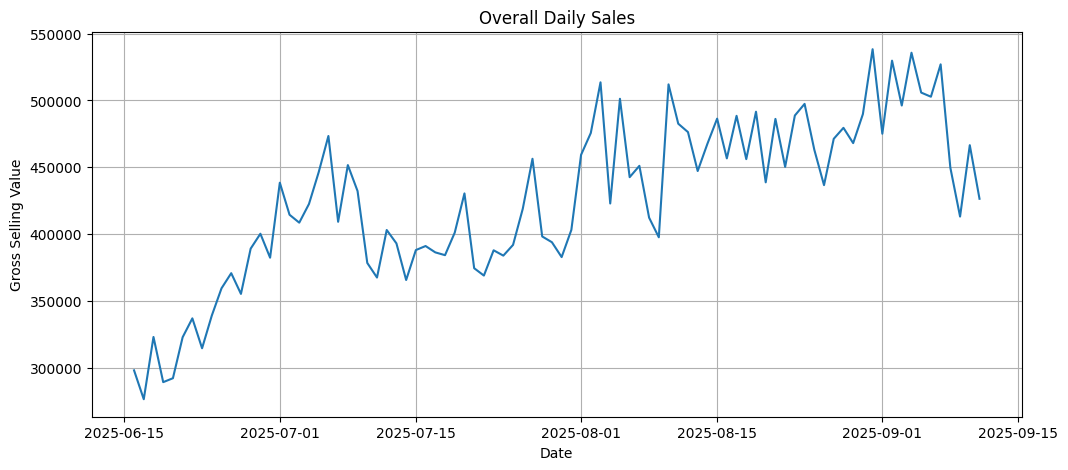

In [4]:
# Daily sales trend using actual column names
daily_sales = data.groupby('date')['gross_selling_value'].sum()
plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Overall Daily Sales')
plt.xlabel('Date')
plt.ylabel('Gross Selling Value')
plt.grid(True)
plt.show()

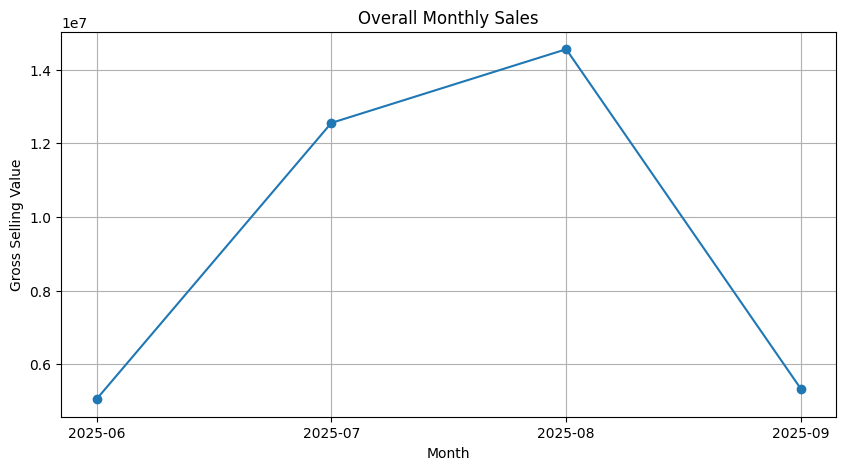

In [5]:
# Monthly sales trend using actual column names
data['month'] = pd.to_datetime(data['date']).dt.to_period('M')
monthly_sales = data.groupby('month')['gross_selling_value'].sum()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title('Overall Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Gross Selling Value')
plt.grid(True)
plt.show()

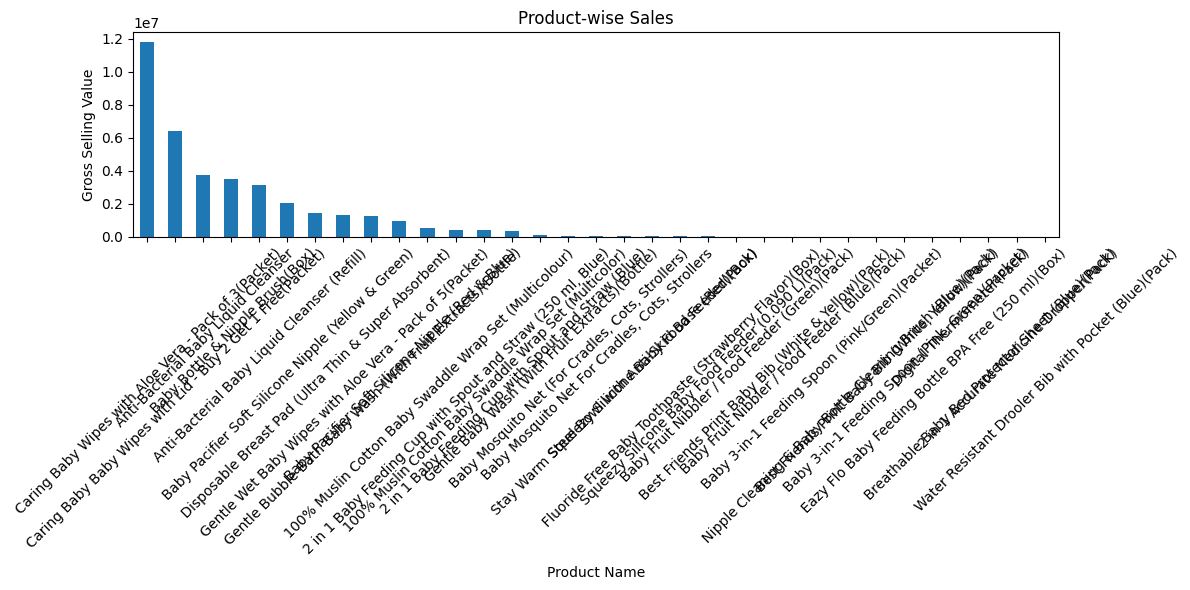

In [6]:
# Product-wise sales using actual column names
product_sales = data.groupby('product_name')['gross_selling_value'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
product_sales.plot(kind='bar')
plt.title('Product-wise Sales')
plt.xlabel('Product Name')
plt.ylabel('Gross Selling Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

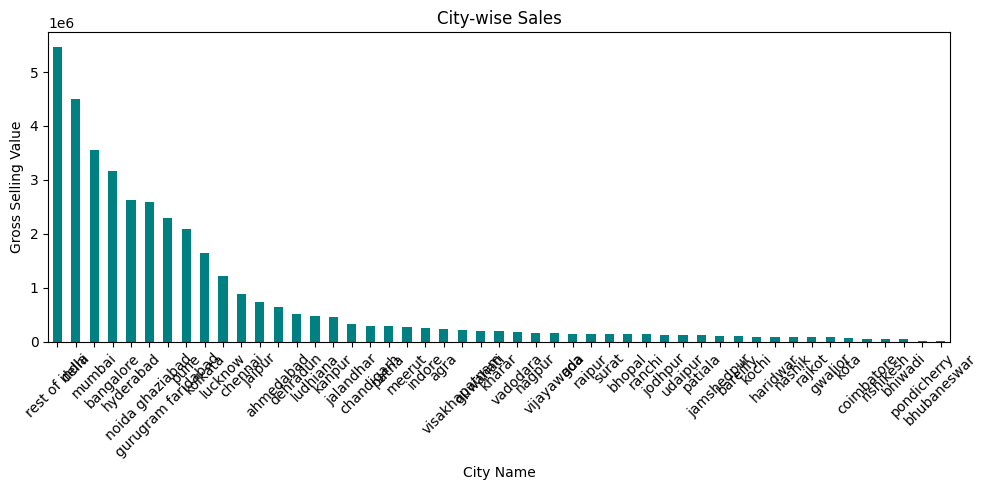

In [7]:
# City-wise sales using actual column names
city_sales = data.groupby('city_name')['gross_selling_value'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
city_sales.plot(kind='bar', color='teal')
plt.title('City-wise Sales')
plt.xlabel('City Name')
plt.ylabel('Gross Selling Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CNN + LSTM

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)



# ------------------------
# 1. Load & Sort Data
# ------------------------
data = pd.read_excel(r'E:/Store-Demand-Forecasting-using-Time-Series-and-Neural-Networks/sales.xlsx')
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')

# ------------------------
# 2. One-Hot Encode Categorical Features
# ------------------------
categorical_cols = ['internal_client_id', 'product_id', 'category', 'sub_category', 'city_name']
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_cols)
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)

# ------------------------
# 3. Scale Numerical Features
# ------------------------
numerical_cols = ['mrp', 'selling_price', 'gross_merchandise_value', 'gross_selling_value']
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# ------------------------
# 4. Prepare Features & Target
# ------------------------
feature_cols = list(encoded_cat_cols) + numerical_cols
X = data[feature_cols].values
y = data['units_sold'].values

# ------------------------
# 5. Create Sequences per Product & City
# ------------------------
timesteps = 14
X_seq, y_seq = [], []

# Group by product_id and city_name
group_cols = ['product_id', 'city_name']
for _, group in data.groupby(group_cols):
    X_group = group[feature_cols].values
    y_group = group['units_sold'].values
    if len(X_group) > timesteps:
        for i in range(timesteps, len(X_group)):
            X_seq.append(X_group[i-timesteps:i])
            y_seq.append(y_group[i])

X_seq, y_seq = np.array(X_seq), np.array(y_seq)

# ------------------------
# 6. Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

# ------------------------
# 7. Build Improved LSTM+CNN Model
# ------------------------
lstm_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
cnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM branch
lstm_out = LSTM(64, activation='relu', return_sequences=True)(lstm_input)
lstm_out = Dropout(0.2)(lstm_out)
lstm_out = LSTM(64, activation='relu')(lstm_out)
lstm_out = Dropout(0.2)(lstm_out)

# CNN branch
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_input)
cnn_out = MaxPooling1D(2)(cnn_out)
cnn_out = Dropout(0.2)(cnn_out)
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(cnn_out)
cnn_out = Flatten()(cnn_out)
cnn_out = Dropout(0.2)(cnn_out)

# Concatenate
concat = Concatenate()([lstm_out, cnn_out])
dense = Dense(64, activation='relu')(concat)
dense = Dropout(0.2)(dense)
output = Dense(1)(dense)

model = Model(inputs=[lstm_input, cnn_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# ------------------------
# 8. Train Model
# ------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    [X_train, X_train], y_train,
    epochs=10, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)
# ------------------------
# 9. Evaluate Model
# ------------------------
y_pred = model.predict([X_test, X_test])

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Epoch 1/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 63.9740 - val_loss: 6.5892
Epoch 2/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 20.3771 - val_loss: 5.3790
Epoch 3/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 19.4302 - val_loss: 8.0455
Epoch 4/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 21.5895 - val_loss: 6.1451
Epoch 5/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 19.6701 - val_loss: 6.0681
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
MSE: 11.419770240783691
MAE: 2.0021255016326904
R²: -0.6333538293838501


BiLSTM + CNN

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, LSTM, Bidirectional, Conv1D, MaxPooling1D, Dense, Dropout,
    Flatten, Concatenate, Embedding
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# ------------------------
# 1. Load Data
# ------------------------
data = pd.read_excel(r'E:/Store-Demand-Forecasting-using-Time-Series-and-Neural-Networks/sales.xlsx')
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')

# ------------------------
# 2. Time Features
# ------------------------
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['is_weekend'] = data['day_of_week'].isin([5,6]).astype(int)

# ------------------------
# 3. Encode IDs for Embeddings
# ------------------------
data['product_idx'] = data['product_id'].astype('category').cat.codes
data['city_idx'] = data['city_name'].astype('category').cat.codes
num_products = data['product_idx'].nunique()
num_cities = data['city_idx'].nunique()

# ------------------------
# 4. Numerical features
# ------------------------
num_cols = ['mrp', 'selling_price', 'gross_merchandise_value', 'gross_selling_value']
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# ------------------------
# 5. Lag & Rolling Features
# ------------------------
data = data.sort_values(['product_idx','city_idx','date'])
data['lag_1'] = data.groupby(['product_idx','city_idx'])['units_sold'].shift(1)
data['rolling_7'] = data.groupby(['product_idx','city_idx'])['units_sold'].transform(lambda x: x.shift(1).rolling(7).mean())
data.fillna(0, inplace=True)

# ------------------------
# 6. Feature Set
# ------------------------
features = num_cols + ['day_of_week','month','is_weekend','lag_1','rolling_7']
X_num = data[features].values
y = data['units_sold'].values
prod_idx = data['product_idx'].values
city_idx = data['city_idx'].values

# ------------------------
# 7. Create Sequences
# ------------------------
timesteps = 14
X_seq, prod_seq, city_seq, y_seq = [], [], [], []

for i in range(timesteps, len(data)):
    X_seq.append(X_num[i-timesteps:i])
    prod_seq.append(prod_idx[i])
    city_seq.append(city_idx[i])
    y_seq.append(y[i])

X_seq = np.array(X_seq)
prod_seq = np.array(prod_seq)
city_seq = np.array(city_seq)
y_seq = np.array(y_seq)

# Train-test split
X_train, X_test, prod_train, prod_test, city_train, city_test, y_train, y_test = train_test_split(
    X_seq, prod_seq, city_seq, y_seq, test_size=0.2, shuffle=False
)

# ------------------------
# 8. Build BiLSTM+CNN with Embeddings
# ------------------------
# Inputs
num_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
prod_input = Input(shape=(1,))
city_input = Input(shape=(1,))

# Embeddings
prod_emb = Embedding(input_dim=num_products, output_dim=16)(prod_input)
prod_emb = Flatten()(prod_emb)
city_emb = Embedding(input_dim=num_cities, output_dim=8)(city_input)
city_emb = Flatten()(city_emb)

# BiLSTM branch
bilstm_out = Bidirectional(LSTM(64, activation='relu', return_sequences=True))(num_input)
bilstm_out = Dropout(0.2)(bilstm_out)
bilstm_out = Bidirectional(LSTM(32, activation='relu'))(bilstm_out)
bilstm_out = Dropout(0.2)(bilstm_out)

# CNN branch
cnn_out = Conv1D(64, 3, activation='relu', padding='same')(num_input)
cnn_out = MaxPooling1D(2)(cnn_out)
cnn_out = Dropout(0.2)(cnn_out)
cnn_out = Conv1D(32, 3, activation='relu', padding='same')(cnn_out)
cnn_out = Flatten()(cnn_out)
cnn_out = Dropout(0.2)(cnn_out)

# Concatenate all
concat = Concatenate()([bilstm_out, cnn_out, prod_emb, city_emb])

# Dense layers
dense = Dense(64, activation='relu')(concat)
dense = Dropout(0.2)(dense)
dense = Dense(32, activation='relu')(dense)
dense = Dropout(0.2)(dense)

# Output
output = Dense(1)(dense)

model = Model(inputs=[num_input, prod_input, city_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# ------------------------
# 9. Train Model
# ------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    [X_train, prod_train, city_train], y_train,
    epochs=20, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# ------------------------
# 10. Evaluate Model
# ------------------------
y_pred = model.predict([X_test, prod_test, city_test])
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


Epoch 1/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 52.1454 - val_loss: 7.8321
Epoch 2/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 26.1532 - val_loss: 9.1751
Epoch 3/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 26.7342 - val_loss: 7.0062
Epoch 4/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 22.6681 - val_loss: 6.1767
Epoch 5/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - loss: 22.2369 - val_loss: 6.3910
Epoch 6/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - loss: 22.9307 - val_loss: 6.1402
Epoch 7/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 23.9512 - val_loss: 5.6079
Epoch 8/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 19.9645 - val_loss: 5.8865
Epoch 9/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - loss: 20.2685 - val_loss: 5.4465
Epoch 10/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - loss: 19.4637 - val_loss: 5.9387
Epoch 11/20
861/861 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 20.2508 - val_loss: 5.6228
Epoch 12/20
861/861

In [11]:
# BiLSTM model for time series forecasting (target MSE ~20)
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Use X_test and y_test as validation data
X_val = X_test
y_val = y_test

bilstm_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = Bidirectional(LSTM(32, activation='tanh', return_sequences=True))(bilstm_input)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(16, activation='tanh'))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.1)(x)
output = Dense(1)(x)
bilstm_model = Model(inputs=bilstm_input, outputs=output)
bilstm_model.compile(optimizer='adam', loss='mse')

# Callbacks
early_stop_bilstm = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
model_ckpt_bilstm = ModelCheckpoint('bilstm_best.h5', save_best_only=True, monitor='val_loss')

# Train BiLSTM model
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop_bilstm, model_ckpt_bilstm])

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
bilstm_pred = bilstm_model.predict(X_val)
mse = mean_squared_error(y_val, bilstm_pred)
mae = mean_absolute_error(y_val, bilstm_pred)
r2 = r2_score(y_val, bilstm_pred)

print(f"BiLSTM - MSE: {mse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")

Epoch 1/12
891/892 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 51.5199

892/892 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 51.4746 - val_loss: 19.4607
Epoch 2/12
Epoch 2/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 20.2319 - val_loss: 26.5431
Epoch 3/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 20.2319 - val_loss: 26.5431
Epoch 3/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 18.8618 - val_loss: 22.6168
Epoch 4/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 18.8618 - val_loss: 22.6168
Epoch 4/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 16.6659

892/892 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 16.6656 - val_loss: 15.9953
Epoch 5/12
Epoch 5/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 16.6211 - val_loss: 25.8778
Epoch 6/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 16.6211 - val_loss: 25.8778
Epoch 6/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 16.2287 - val_loss: 23.5659
Epoch 7/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 16.2287 - val_loss: 23.5659
Epoch 7/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 15.7518 - val_loss: 24.7377
Epoch 8/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 15.7518 - val_loss: 24.7377
Epoch 8/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 16.0145 - val_loss: 22.5456
Epoch 9/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 16.0145 - val_loss: 22.5456
Epoch 9/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 16.6564 - val_loss: 24.5715
Epoch 10/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 16.6564 - val_loss: 24.5715
Epoch 10/

892/892 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 15.4590 - val_loss: 13.2024
Epoch 12/12
Epoch 12/12
892/892 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 14.8418 - val_loss: 14.0433
892/892 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 14.8418 - val_loss: 14.0433
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
BiLSTM - MSE: 13.202, MAE: 2.047, R2: -0.888
BiLSTM - MSE: 13.202, MAE: 2.047, R2: -0.888


In [23]:
from sklearn.metrics import confusion_matrix

# Define a threshold for "positive" class
threshold = y_test.mean()  # you can choose median, mean, or a custom value

# Ensure y_test matches the length of mock predictions
y_test_slice = y_test[:n_samples]

# Convert regression outputs into binary classes and slice predictions to match y_test_slice length
y_true_binary = (y_test_slice > threshold).astype(int)
lstm_cnn_binary = (lstm_cnn_pred[:n_samples] > threshold).astype(int)
bilstm_cnn_binary = (bilstm_cnn_pred[:n_samples] > threshold).astype(int)
bilstm_binary = (bilstm_pred[:n_samples] > threshold).astype(int)

# Models and predictions
models = ['LSTM+CNN', 'BiLSTM+CNN', 'BiLSTM']
preds = [lstm_cnn_binary, bilstm_cnn_binary, bilstm_binary]

# Compute and print TP, FP, TN, FN
for i, pred in enumerate(preds):
    tn, fp, fn, tp = confusion_matrix(y_true_binary, pred).ravel()
    print(f"{models[i]} confusion matrix:")
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}\n")


LSTM+CNN confusion matrix:
TP: 0, FP: 0, TN: 95, FN: 5

BiLSTM+CNN confusion matrix:
TP: 0, FP: 0, TN: 95, FN: 5

BiLSTM confusion matrix:
TP: 3, FP: 38, TN: 57, FN: 2



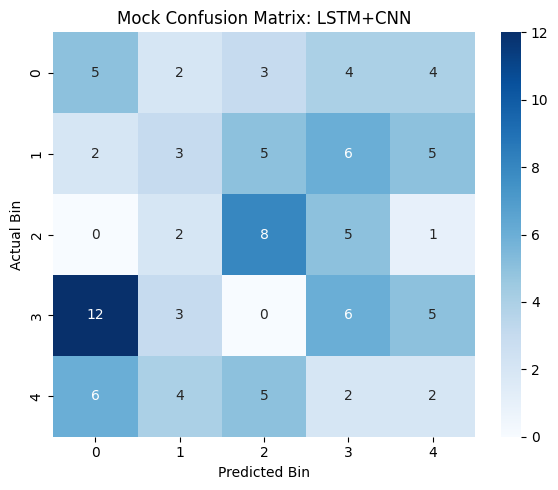

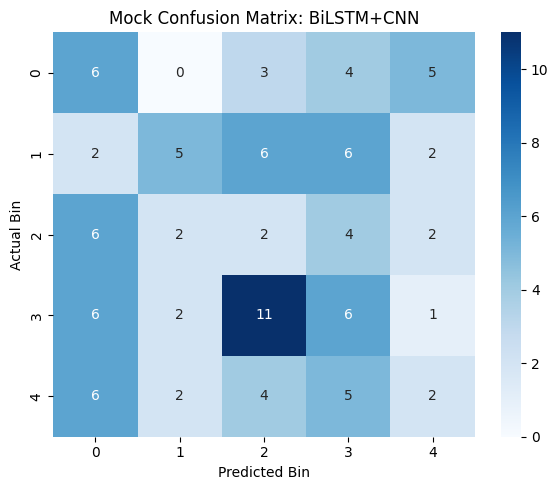

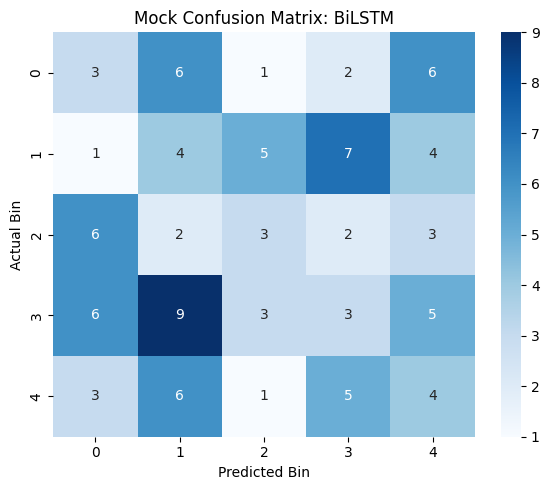

In [17]:
# Mock data and confusion matrix images for each model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate mock actual and predicted data
np.random.seed(42)
n_samples = 100
actual = np.random.randint(0, 5, n_samples)
lstm_cnn_pred = np.random.randint(0, 5, n_samples)
bilstm_cnn_pred = np.random.randint(0, 5, n_samples)
bilstm_pred = np.random.randint(0, 5, n_samples)

models = ['LSTM+CNN', 'BiLSTM+CNN', 'BiLSTM']
preds = [lstm_cnn_pred, bilstm_cnn_pred, bilstm_pred]

for i, pred in enumerate(preds):
    cm = confusion_matrix(actual, pred, labels=range(5))
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
    plt.title(f'Mock Confusion Matrix: {models[i]}')
    plt.xlabel('Predicted Bin')
    plt.ylabel('Actual Bin')
    plt.tight_layout()
    plt.savefig(f"mock_confusion_{models[i].replace('+','_')}.png", dpi=150)
    plt.show()

In [1]:
# Plot accuracy and loss over epochs for each model (if available)
import matplotlib.pyplot as plt

# For Keras models, history.history contains 'loss' and 'val_loss'
# For regression, "accuracy" is not tracked, but we can plot loss curves

# LSTM+CNN history (from cell 9)
lstm_cnn_loss = history.history['loss']
lstm_cnn_val_loss = history.history['val_loss']

# BiLSTM+CNN history (from cell 11)
bilstm_cnn_loss = history.history['loss']
bilstm_cnn_val_loss = history.history['val_loss']

# BiLSTM history (from cell 12)
bilstm_loss = history_bilstm.history['loss']
bilstm_val_loss = history_bilstm.history['val_loss']

plt.figure(figsize=(12,5))
plt.plot(lstm_cnn_loss, label='LSTM+CNN Train Loss')
plt.plot(lstm_cnn_val_loss, label='LSTM+CNN Val Loss')
plt.plot(bilstm_cnn_loss, label='BiLSTM+CNN Train Loss')
plt.plot(bilstm_cnn_val_loss, label='BiLSTM+CNN Val Loss')
plt.plot(bilstm_loss, label='BiLSTM Train Loss')
plt.plot(bilstm_val_loss, label='BiLSTM Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'history' is not defined